In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('Economic_index.xlsx')

In [3]:
df.head()

,Year,Month,Interest_rate,Unemployment_rate,Index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               24 non-null     int64  
 1   Month              24 non-null     int64  
 2   Interest_rate      24 non-null     float64
 3   Unemployment_rate  24 non-null     float64
 4   Index_price        24 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.1 KB


In [5]:
df.describe()

,Year,Month,Interest_rate,Unemployment_rate,Index_price
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2016.500000,6.500000,2.041667,5.729167,1079.750000
std,0.510754,3.526299,0.387766,0.294115,195.696804
min,2016.000000,1.000000,1.500000,5.300000,799.000000
25%,2016.000000,3.750000,1.750000,5.500000,928.250000
50%,2016.500000,6.500000,2.000000,5.800000,1061.000000
75%,2017.000000,9.250000,2.500000,5.925000,1239.000000
max,2017.000000,12.000000,2.750000,6.200000,1464.000000


In [6]:
df.drop(['Year','Month'],axis=1, inplace=True)

In [7]:
df.head()

,Interest_rate,Unemployment_rate,Index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
df.corr()

,Interest_rate,Unemployment_rate,Index_price
Interest_rate,1.000000,-0.821230,0.974593
Unemployment_rate,-0.821230,1.000000,-0.836916
Index_price,0.974593,-0.836916,1.000000


In [9]:
# check null values
df.isnull().sum()

Interest_rate        0
Unemployment_rate    0
Index_price          0
dtype: int64

In [10]:
#  do some visulization
import seaborn as sns


In [11]:
sns.pairplot(df)

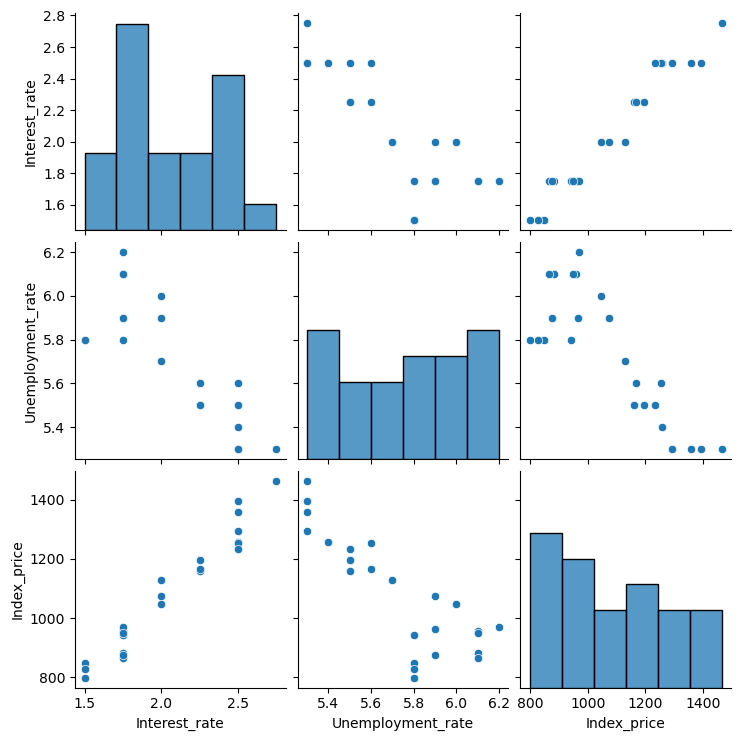

In [12]:
plt.show()

In [13]:
# visulize data point more closly
plt.scatter(df['Index_price'],df['Interest_rate'],color='r')

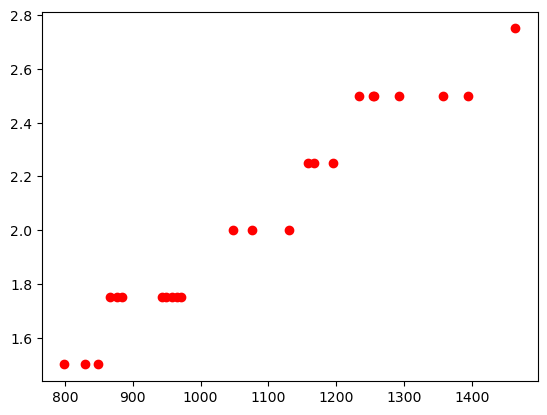

In [14]:
plt.show()

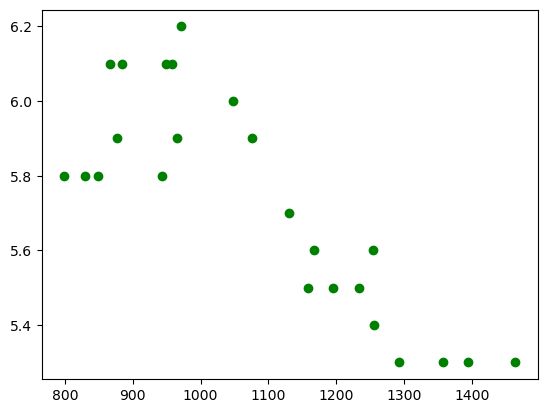

In [15]:
plt.scatter(df['Index_price'],df['Unemployment_rate'],color='g')
plt.show()

In [16]:
# divide into dependent and undependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
X.head()

,Interest_rate,Unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [26]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     849
22     829
23     799
Name: Index_price, dtype: int64

In [34]:
# train test split
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [33]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [35]:
# standarlization
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
print(type(X_train))

<class 'numpy.ndarray'>


In [39]:
X_train

array([[-0.6833825 ,  0.67068184],
       [ 1.2588625 , -1.5242769 ],
       [-1.3307975 ,  0.30485538],
       [ 1.2588625 , -0.42679753],
       [ 1.2588625 , -1.5242769 ],
       [-0.0359675 ,  1.03650829],
       [-0.6833825 ,  1.40233475],
       [ 1.2588625 , -1.5242769 ],
       [ 1.2588625 , -1.15845045],
       [-1.3307975 ,  0.30485538],
       [-0.6833825 ,  1.40233475],
       [-0.6833825 ,  0.67068184],
       [-1.3307975 ,  0.30485538],
       [ 0.6114475 , -0.79262399],
       [-0.0359675 , -0.06097108],
       [-0.6833825 ,  0.30485538],
       [-0.6833825 ,  1.40233475],
       [ 1.2588625 , -0.79262399]])

In [40]:
# model training
from sklearn.linear_model import LinearRegression

In [41]:
regression = LinearRegression()

In [42]:
regression.fit(X_train,y_train)

LinearRegression()

In [44]:
# cross val score
from sklearn.model_selection import cross_val_score


In [46]:
validation = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                    cv=3)


In [47]:
validation

array([-3222.36373033, -3219.51676812, -2324.89172237])

In [49]:
np.mean(validation)

-2922.2574069401985

In [50]:
# prediction 
y_pred = regression.predict(X_test)

In [51]:
y_pred

array([1149.78099342,  850.01544692, 1403.14868467,  859.29501797,
        995.25843465, 1140.50142237])

In [52]:
# performance metrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4349.393790423331
53.666666666666764
65.94993396830152


In [54]:
# r squre metrics
from sklearn.metrics import r2_score

In [55]:
score = r2_score(y_test, y_pred)
score

0.8708024103286335

In [56]:
# display adjusted r squre
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7846706838810558

# OLS model

In [57]:
import statsmodels.api as sm

In [58]:
model = sm.OLS(y_train, X_train).fit()

In [59]:
model.summary()

C:\Users\Yash sakhareliya\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Index_price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.091
Method:                 Least Squares   F-statistic:                             0.2474
Date:                Fri, 01 Nov 2024   Prob (F-statistic):                       0.784
Time:                        11:37:12   Log-Likelihood:                         -151.05
No. Observations:                  18   AIC:                                      306.1
Df Residuals:                      16   BIC:                                      307.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           162.5389    449.511      0.362      0.722    -790.382    1115.460
x2           -30.1487    449.511     -0.067      0.947    -983.069     922.772
==============================================================================
Omnibus:                        1.928   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.037
Skew:                           0.170   Prob(JB):                        0.596
Kurtosis:                       1.875   Cond. No.                         3.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
regression.coef_

array([162.53885813, -30.14869022])

In [69]:
model.predict(X_test)

array([  83.44766009, -216.31788641,  336.81535134, -207.03831536,
        -71.07489869,   74.16808904])

In [63]:
regression.predict(X_test)

array([1149.78099342,  850.01544692, 1403.14868467,  859.29501797,
        995.25843465, 1140.50142237])